In [1]:
import pandas as pd

In [10]:
# Importing Data

In [3]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [11]:
# Annual Salary for each customer

In [31]:
df_salary = df[df["txn_description"]=='PAY/SALARY'].groupby('customer_id').mean()
df_visualization = pd.DataFrame({'Average Salary':df_salary['amount']})
df_visualization

,Average Salary
customer_id,
CUS-1005756958,970.47
CUS-1117979751,3578.65
CUS-1140341822,1916.51
CUS-1147642491,1711.39
CUS-1196156254,3903.73
...,...
CUS-72755508,725.32
CUS-809013380,1037.07
CUS-860700529,1808.62


In [46]:
# Predictive Analysis

In [47]:
## Correlation

In [32]:
df_salary = df_salary.rename(columns={"amount":"Annual Salary"})
df_salary = df_salary.drop(['card_present_flag','merchant_code'],axis=1)

In [34]:
df_salary.corr()

,balance,age,Annual Salary
balance,1.000000,0.227026,0.231019
age,0.227026,1.000000,-0.135264
Annual Salary,0.231019,-0.135264,1.000000


In [48]:
## Visualizing Correlation using Scatter Plot

In [39]:
import matplotlib.pyplot as plt
import numpy as np

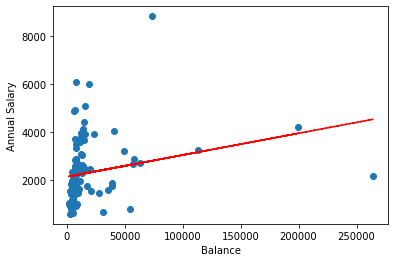

In [44]:
x = df_salary['balance']
y = df_salary['Annual Salary']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(x,y)
plt.xlabel('Balance')
plt.ylabel('Annual Salary')
plt.plot(x,p(x),"r--")

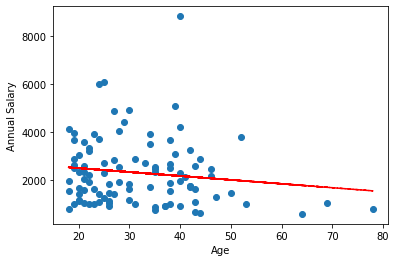

In [45]:
x = df_salary['age']
y = df_salary['Annual Salary']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.plot(x,p(x),"r--")

In [51]:
## Linear Regression

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [85]:
x = df_salary['balance']
y = df_salary['Annual Salary']
x_train,x_test,y_train,y_test=train_test_split(x,y,
train_size=0.8,
test_size=0.2)

In [86]:
linear_reg = LinearRegression()

In [87]:
linear_reg.fit(np.array(x_train.values.tolist()).reshape(-1,1),np.array(y_train.values.tolist()).reshape(-1,1))
y_pred = linear_reg.predict(np.array(x_test.values.tolist()).reshape(-1,1))

Coefficients: 
 [[0.00827375]]
Mean squared error: 896197.01


Text(0, 0.5, 'Annual Salary')

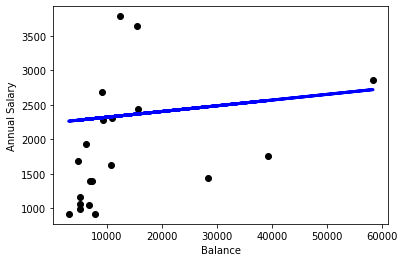

In [89]:
print('Coefficients: \n', linear_reg.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Balance')
plt.ylabel('Annual Salary')

In [90]:
x = df_salary['age']
y = df_salary['Annual Salary']
x_train,x_test,y_train,y_test=train_test_split(x,y,
train_size=0.8,
test_size=0.2)

In [91]:
linear_reg = LinearRegression()

In [93]:
linear_reg.fit(np.array(x_train.values.tolist()).reshape(-1,1),np.array(y_train.values.tolist()).reshape(-1,1))
y_pred = linear_reg.predict(np.array(x_test.values.tolist()).reshape(-1,1))

Coefficients: 
 [[-9.08601159]]
Mean squared error: 1704953.50


Text(0, 0.5, 'Annual Salary')

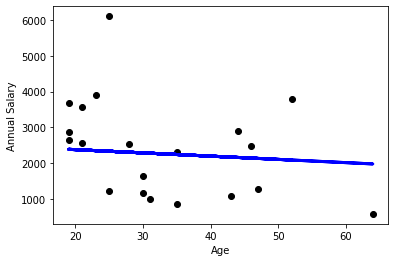

In [94]:
print('Coefficients: \n', linear_reg.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Annual Salary')